# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Gradient descent in 1D
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/dudl/?couponCode=202207

In [113]:
# import all necessary modules
import numpy as np
from numpy import log10
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg') # makes plots look nicer

C:\Users\perwa\AppData\Local\Temp\ipykernel_29048\628815942.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # makes plots look nicer


# Gradient descent in 1D

In [114]:
# function (as a function)
def fx(x):
  return 3*x**2 - 3*x + 4

# derivative function
def deriv(x):
  return 6*x - 3

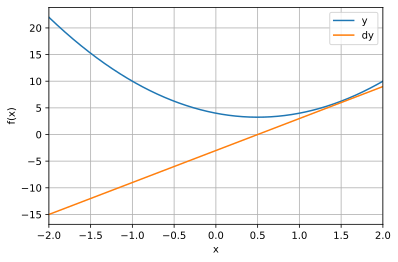

In [115]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,fx(x), x,deriv(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [116]:
# random starting point
localmin = np.random.choice(x,1)
print(localmin)

# learning parameters
learning_rate0 = 0.1
training_epochs = 100
gradient_thr = 0.0000001

grad = 1
i = 1
while np.abs(grad)>gradient_thr:
  i = i + 1
  grad = deriv(localmin)
  localmin = localmin - learning_rate0*grad
  

# run through training
# for i in range(training_epochs):
#   grad = deriv(localmin)
#   localmin = localmin - learning_rate*grad


print(i)
localmin

# How do we know how big or small to make the gradient threshold? We do not know
# how many iterations it will take in order to reach the desired criteria.
# Furthermore, it is hard to know what a reasonable threshold is; what is a
# "small enough" gradient?


[-1.16]
23


array([0.5])

In [117]:
# Modification of learning rate 1 - let learning rate be a function of the derivative.
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate0 = .01
training_epochs = 1000
gradient_thr = 0.0001

grad = 1
i = 1
gradAbs0 = np.abs(deriv(localmin))
print(gradAbs0)
while np.abs(grad)>gradient_thr:
  i = i + 1
  grad = deriv(localmin)
  # update learning rate based on steepness of gradient:
  a = 10**(np.log10(np.abs(grad)))*1000
  learning_rate = learning_rate0*a
  localmin = localmin - learning_rate*grad

print(i)

# I am able to get below the threshold a bit faster with this method than when playing around with a fixed
# learning rate (10 iterations vs 14 iterations)


[2.94]
11


C:\Users\perwa\AppData\Local\Temp\ipykernel_29048\677650407.py:20: RuntimeWarning: overflow encountered in multiply
  localmin = localmin - learning_rate*grad
C:\Users\perwa\AppData\Local\Temp\ipykernel_29048\677650407.py:20: RuntimeWarning: invalid value encountered in subtract
  localmin = localmin - learning_rate*grad


In [118]:
# ¤¤¤ Modification of learning rate 2 - let learning rate be a function of epoch ¤¤¤
localmin = np.random.choice(x,1)

# learning parameters
learning_rate0 = .1
training_epochs = 1000
gradient_thr = 0.0000001

grad = 1
i = 1
gradAbs0 = np.abs(deriv(localmin))
print(gradAbs0)
while np.abs(grad)>gradient_thr:
  i = i + 1
  grad = deriv(localmin)
  # rule 1: halve the learning rate every 5 epochs/iterations
  # rule 2: halve the learning rate everytime the order of magnitude increases by 1
  a = 0.5 ** np.floor((np.divide(np.log10(i),1)+1))
  learning_rate = learning_rate0*a
  localmin = localmin - learning_rate*grad

print(i)

# The issue with this method is that it may completely fail to reach the set tolerance, since the learning rate 
# goes to zero too quickly. Using a rule where I decrease the learning rate by a set factor everytime seems to avoid this problem


[5.46]
105


In [119]:
# ¤¤¤ Modification of learning rate 3 - let learning rate be a function of the Loss ¤¤¤
localmin = np.random.choice(x,1)

# learning parameters
learning_rate0 = .1
training_epochs = 1000
gradient_thr = 0.0000001

grad = 1
i = 1

f = fx(localmin)
while np.abs(grad)>gradient_thr:
  i = i + 1
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  loss = (f - fx(localmin))**2
  learning_rate = learning_rate*loss

print(i)

# fastest method so far -  only 3 iterations satisfies the tolerance.


KeyboardInterrupt: 

C:\Users\perwa\AppData\Local\Temp\ipykernel_29048\255255116.py:31: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparamsLocalMin[i,:] = localmin, grad, learning_rate


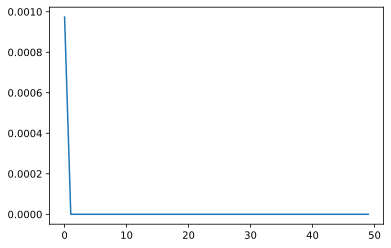

In [157]:
# ¤¤¤ Modification of learning rate 4 - let learning rate be a function of the estimated local minima ¤¤¤
localmin = np.random.choice(x,1)

# learning parameters
learning_rate0 = 0.1
training_epochs = 50

# run through training and store all the results
modelparamsLocalMin = np.zeros((training_epochs,3))
learning_rate = learning_rate0

for i in range(training_epochs):
  # take the derivative:
  grad = deriv(localmin)
  
  localmin0 = localmin

  # update term:
  delta = learning_rate*grad

  # update local minimum estimate:
  localmin = localmin - delta

  # calculate the "loss" based on the difference between the previous and current estimate:
  loss = (delta)**1.5

  # update the learning rate based on the loss function:
  learning_rate = learning_rate*loss

  # store iteration values:
  modelparamsLocalMin[i,:] = localmin, grad, learning_rate

# As fast as the method based on loss based on the iteration-to-iteration difference in function value
#  - only 3 iterations satisfies the tolerance.

# Ways for this method to fail: I can see this method failing when the minimum has extremely low curvature, because then the fact that
# there is little change in x_0 between iterations does not imply nearness to the minimum.
plt.plot(modelparamsLocalMin[:,2])


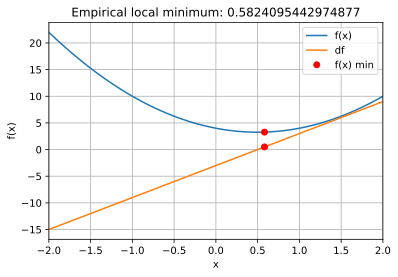

In [50]:
# plot the results

plt.plot(x,fx(x), x,deriv(x))
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Store the model parameters and outputs on each iteration

In [9]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,:] = localmin,grad


C:\Users\perwa\AppData\Local\Temp\ipykernel_23120\1412639067.py:13: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  modelparams[i,:] = localmin,grad


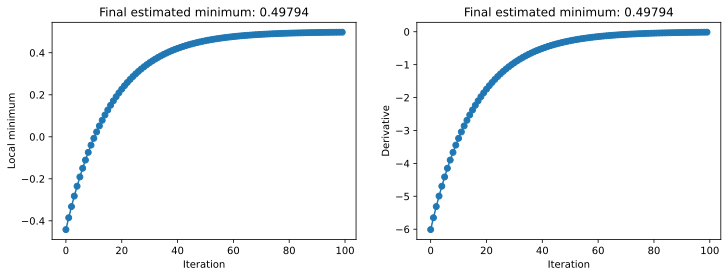

In [17]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Additional explorations

In [ ]:
# 1) Most often in DL, the model trains for a set number of iterations, which is what we do here. But there are other ways
#    of defining how long the training lasts. Modify the code so that training ends when the derivative is smaller than 
#    some threshold, e.g., 0.1. Make sure your code is robust for negative derivatives.
# 
# 2) Does this change to the code produce a more accurate result? What if you change the stopping threshold?
# 
# 3) Can you think of any potential problems that might arise when the stopping criterion is based on the derivative 
#    instead of a specified number of training epochs?
# 